In [1]:
import pickle 
import os
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot

In [2]:
def get_antenne_height(key):
    with open('../data/generated_data/antenne_height.pkl', 'rb') as f:
        df_ante_h = pickle.load(f)
    ante_h = {}
    index = df_ante_h[df_ante_h['date'] == key]
    ante_h['2'] = float(index['antenne2'])
    ante_h['3'] = float(index['antenne3'])
    return ante_h

In [ ]:
def get_gauge_data(date_key):
    ts_gauge = pd.read_csv(f'../data/gauge/2022{date_key}_gauge.csv')
    gauge_time = []
    h_ts_gauge = []
    for t,h in zip(ts_gauge['0'],ts_gauge['1']):
        gauge_time.append(datetime.fromtimestamp(t,tz=timezone.utc))
        h_ts_gauge.append(h)
    return gauge_time,h_ts_gauge

In [3]:
with open('../data/generated_data/timeseries_ele30_time30.pkl', 'rb') as f:
    ts_30_30_dict = pickle.load(f)

In [6]:
# 0811 no antenne height yet
date_key = '0811'
ts_0811_2 = ts_30_30_dict[f'{date_key}_2']
ts_0811_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_0811 = get_antenne_height(date_key)
h_ts_0811_2 = ante_h_0811['2'] - np.asarray(list(ts_0811_2.values()))
h_ts_0811_3 = ante_h_0811['3'] - np.asarray(list(ts_0811_3.values()))
gauge_time_0811,h_ts_gauge_0811 = get_gauge_data(date_key)


plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_0811_2.keys()), list(h_ts_0811_2),s=1)
ax.scatter(list(ts_0811_3.keys()), list(h_ts_0811_3),s=1)
ax.scatter(gauge_time_0811,h_ts_gauge_0811,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 11.Aug (elevation 0-30, time window 30 minutes)')
fig.set_size_inches(9,3)


TypeError: cannot convert the series to <class 'float'>

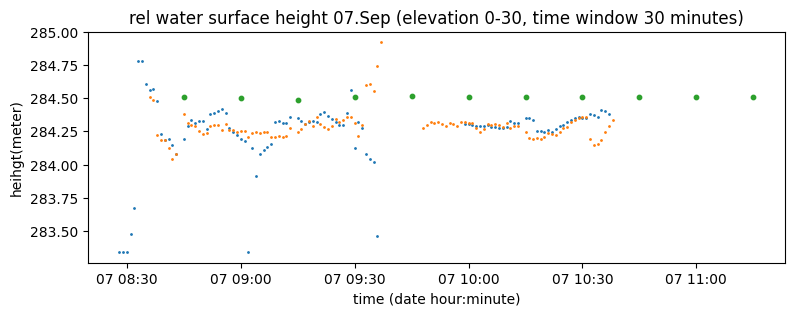

In [4]:
# 0907
date_key = '0907'
ts_0907_2 = ts_30_30_dict[f'{date_key}_2']
ts_0907_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_0907 = get_antenne_height(date_key)
h_ts_0907_2 = ante_h_0907['2'] - np.asarray(list(ts_0907_2.values()))
h_ts_0907_3 = ante_h_0907['3'] - np.asarray(list(ts_0907_3.values()))
gauge_time_0907,h_ts_gauge_0907 = get_gauge_data(date_key)


plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_0907_2.keys()), list(h_ts_0907_2),s=1)
ax.scatter(list(ts_0907_3.keys()), list(h_ts_0907_3),s=1)
ax.scatter(gauge_time_0907,h_ts_gauge_0907,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 07.Sep (elevation 0-30, time window 30 minutes)')
fig.set_size_inches(9,3)


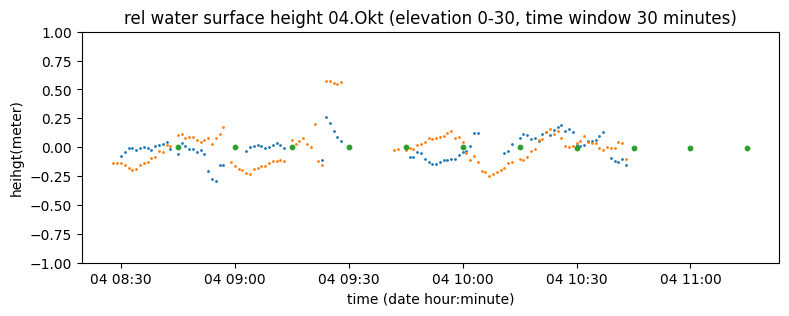

In [8]:
# 1004 no antenne height yet
date_key = '1004'
ts_1004_2 = ts_30_30_dict[f'{date_key}_2']
ts_1004_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_1004 = get_antenne_height(date_key)
h_ts_1004_2 = ante_h_1004['2'] - np.asarray(list(ts_1004_2.values()))
h_ts_1004_3 = ante_h_1004['3'] - np.asarray(list(ts_1004_3.values()))
gauge_time_1004,h_ts_gauge_1004 = get_gauge_data(date_key)


plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1004_2.keys()), list(h_ts_1004_2),s=1)
ax.scatter(list(ts_1004_3.keys()), list(h_ts_1004_3),s=1)
ax.scatter(gauge_time_1004,h_ts_gauge_1004,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 11.Aug (elevation 0-30, time window 30 minutes)')
fig.set_size_inches(9,3)


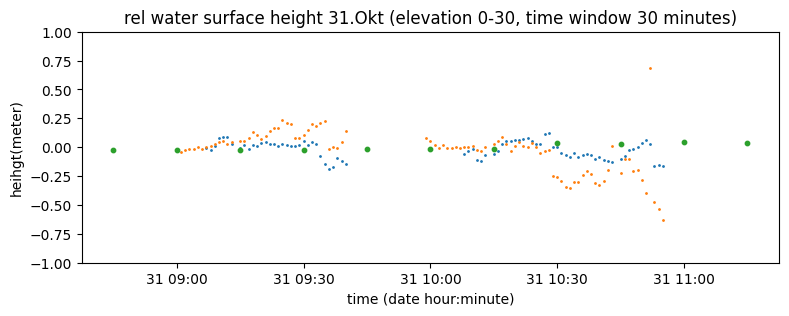

In [10]:
ts_1031_2 = ts_30_30_dict['1031_2']
ts_1031_3 = ts_30_30_dict['1031_3']
ts_gauge = pd.read_csv('../data/gauge/20221031_gauge.csv')

median_ts_2 = np.median(np.array(list(ts_1031_2.values())))
median_ts_3 = np.median(np.array(list(ts_1031_3.values())))

res_ts_1031_2 = -(np.array(list(ts_1031_2.values())) - median_ts_2)
res_ts_1031_3 = -(np.array(list(ts_1031_3.values())) - median_ts_3)

gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t,tz=timezone.utc))
    res_ts_gauge.append(h-gauge_mean)

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), res_ts_1031_2,s=1)
ax.scatter(list(ts_1031_3.keys()), res_ts_1031_3,s=1)
ax.scatter(gauge_time,res_ts_gauge,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('rel water surface height 31.Okt (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)

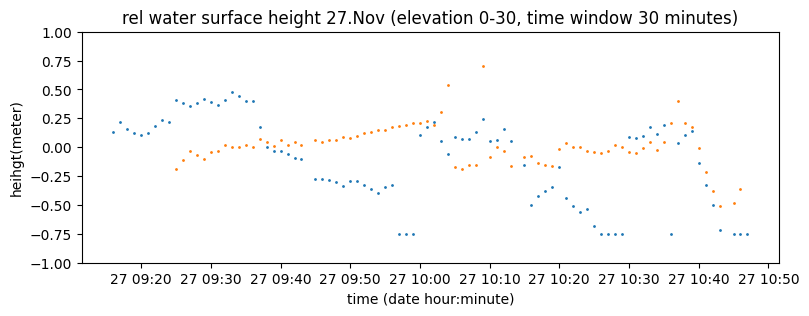

In [12]:
ts_1031_2 = ts_30_30_dict['1127_2']
ts_1031_3 = ts_30_30_dict['1127_3']
# ts_gauge = pd.read_csv('../data/gauge/20221127_gauge.csv')

median_ts_2 = np.median(np.array(list(ts_1031_2.values())))
median_ts_3 = np.median(np.array(list(ts_1031_3.values())))

res_ts_1031_2 = -(np.array(list(ts_1031_2.values())) - median_ts_2)
res_ts_1031_3 = -(np.array(list(ts_1031_3.values())) - median_ts_3)

'''gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t,tz=timezone.utc))
    res_ts_gauge.append(h-gauge_mean)'''

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), res_ts_1031_2,s=1)
ax.scatter(list(ts_1031_3.keys()), res_ts_1031_3,s=1)
# ax.scatter(gauge_time,res_ts_gauge,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('rel water surface height 27.Nov (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)